In [2]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_csv('data.csv', parse_dates=['Date'])
df.index = df['Date']
df.drop(columns=['Date'],inplace=True)
df= df[df.index> datetime(1997, 5, 19)]

In [3]:
import numpy as np
def moyenne_mobile(nom):
    temp = df[[nom+'_Open', nom+'_Close']].mean(axis=1)
    return temp.rolling(7).mean()


liste_actions = ['NASDAQ', 'NYSE', 'USD_eur', 'BTC_USD', 'VIX', 'DX', 'Apple', 'Tesla', 'Google', 'Pfizer', 'Amazon', 'Facebook']
am = pd.DataFrame(columns=liste_actions)
for action in liste_actions:
    am[action] = moyenne_mobile(action)

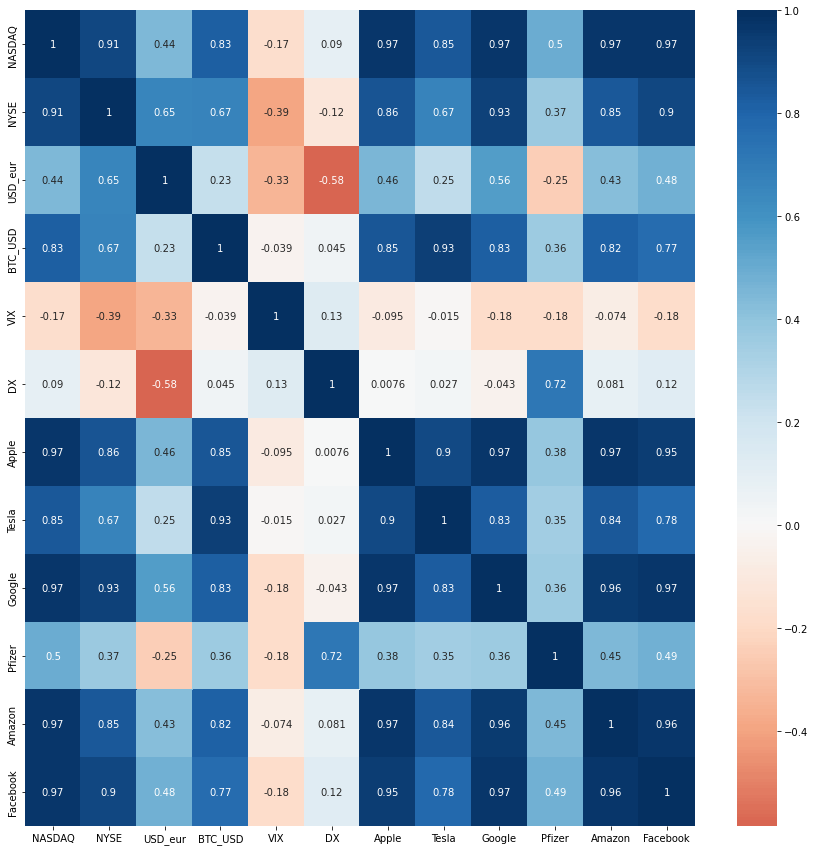

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15,15))
sns.heatmap(am.corr(), annot=True, cmap = 'RdBu', center=0);